# CMPE 297 - Assignment 4 - Part 2 
##Deep AutoVIML - Tabular Task on Heart disease 
[Code Reference](https://towardsdatascience.com/autoviml-automating-machine-learning-4792fee6ae1e)


#1.0 Load libraries

In [2]:
!pip install deep_autoviml

In [3]:
from deep_autoviml import deep_autoviml as deepauto
import pandas as pd
import numpy as np


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


#2.0 Load the heart disease dataset 

https://www.kaggle.com/johnsmith88/heart-disease-dataset?select=heart.csv

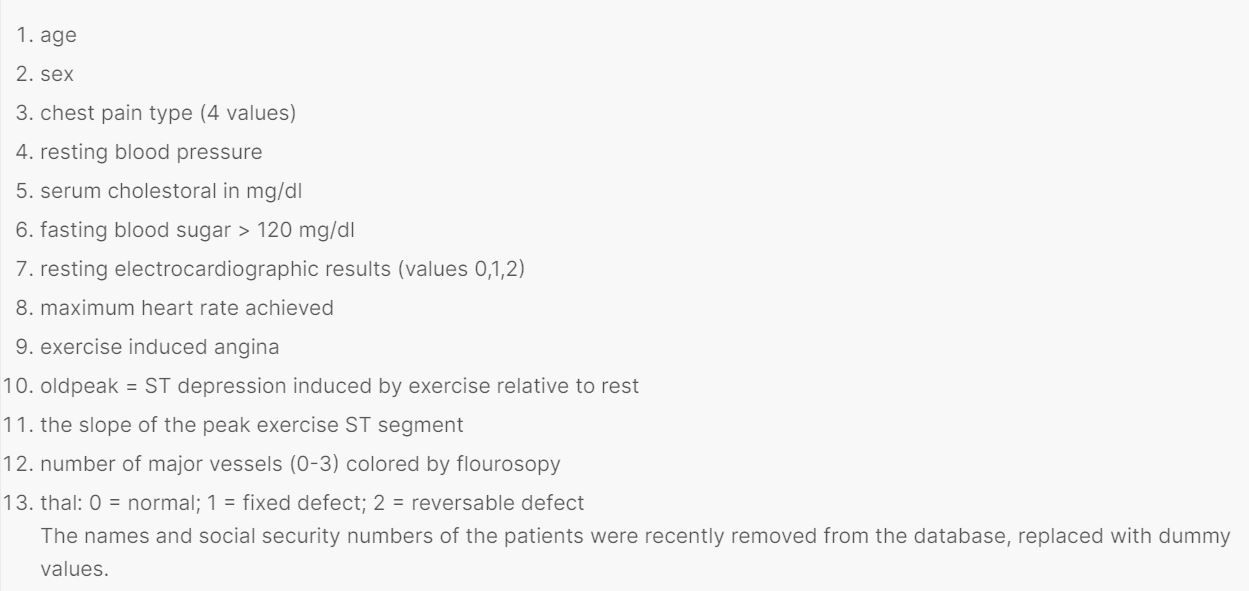

In [4]:
# Mount Google Drive
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Read in heart disease dataset
df = pd.read_csv('/content/drive/My Drive/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
target = 'target'
df[target].value_counts()

1    526
0    499
Name: target, dtype: int64

#3.0 Train/ Test Split

In [12]:
df_train = df.sample(frac=.70)
df_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
349,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
487,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0
330,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1


In [22]:
df_test = df.sample(frac=.30)
df_test.to_csv('/content/test.csv')
df_test = df.drop(columns=['target'])
df_test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2


#4.0 Deep Auto Vimil

##4.1. Model Config

In [14]:
keras_model_type = "auto" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "Predict Heart Disease"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':"",
                 'max_trials': 5, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

##4.2. Model Train

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
    Classifying variables using data sample in pandas...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...

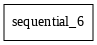

Model plot saved in file: deep_autoviml_Predict Heart Disease_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 1.0112676056338028}
    original datasize = 718, initial batchsize = 32
    Early stopping : True
    recommended steps per epoch = 11
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 1200
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 11, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default


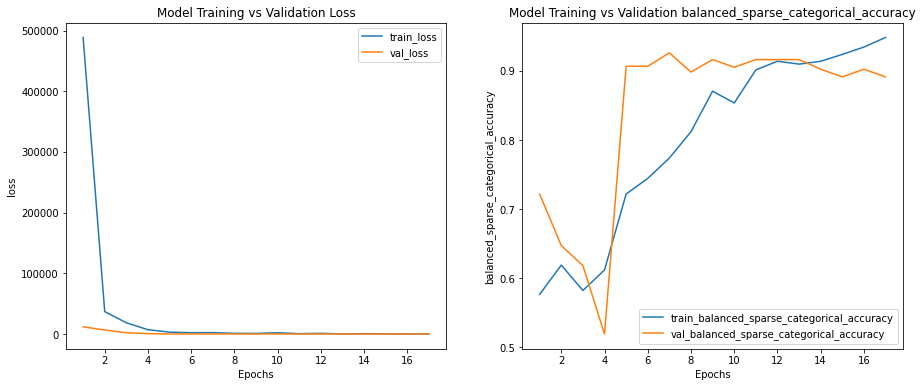

Time taken to train model (in mins) = 1
    Stopped epoch = 7
Held out data actuals shape: (96,)
    samples from label: [1, 0, 0, 0, 1, 0, 0, 0, 0, 0]

Held out predictions shape:(96,)
    Sample predictions: [1 0 0 0 1 0 0 0 0 0]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: target
#################################################################


    Accuracy          = 92.7%
    Balanced Accuracy = 92.4%
    Precision         = 95.1%
    Average Precision = 93.0%
    Recall            = 88.6%
    F1 Score          = 91.8%
    ROC AUC           = 94.4%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.008152124
    set learning rate using best model: 0.008152124
    max epochs for training = 7

Model not being saved since save_model_flag set to False...
2

Saving vocab dictionary using pickle in Predict Heart Disease/auto/model_2021_10_30-03_20_54/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in Predict Heart Disease/auto/model_2021_10_30-03_20_54/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in Predict Heart Disease/auto/model_2021_10_30-03_20_54/artifacts/var_df.pickle...will take time...
    Saved pickle file in Predict Heart Disease/auto/model_2021_10_30-03_20_54/artifa

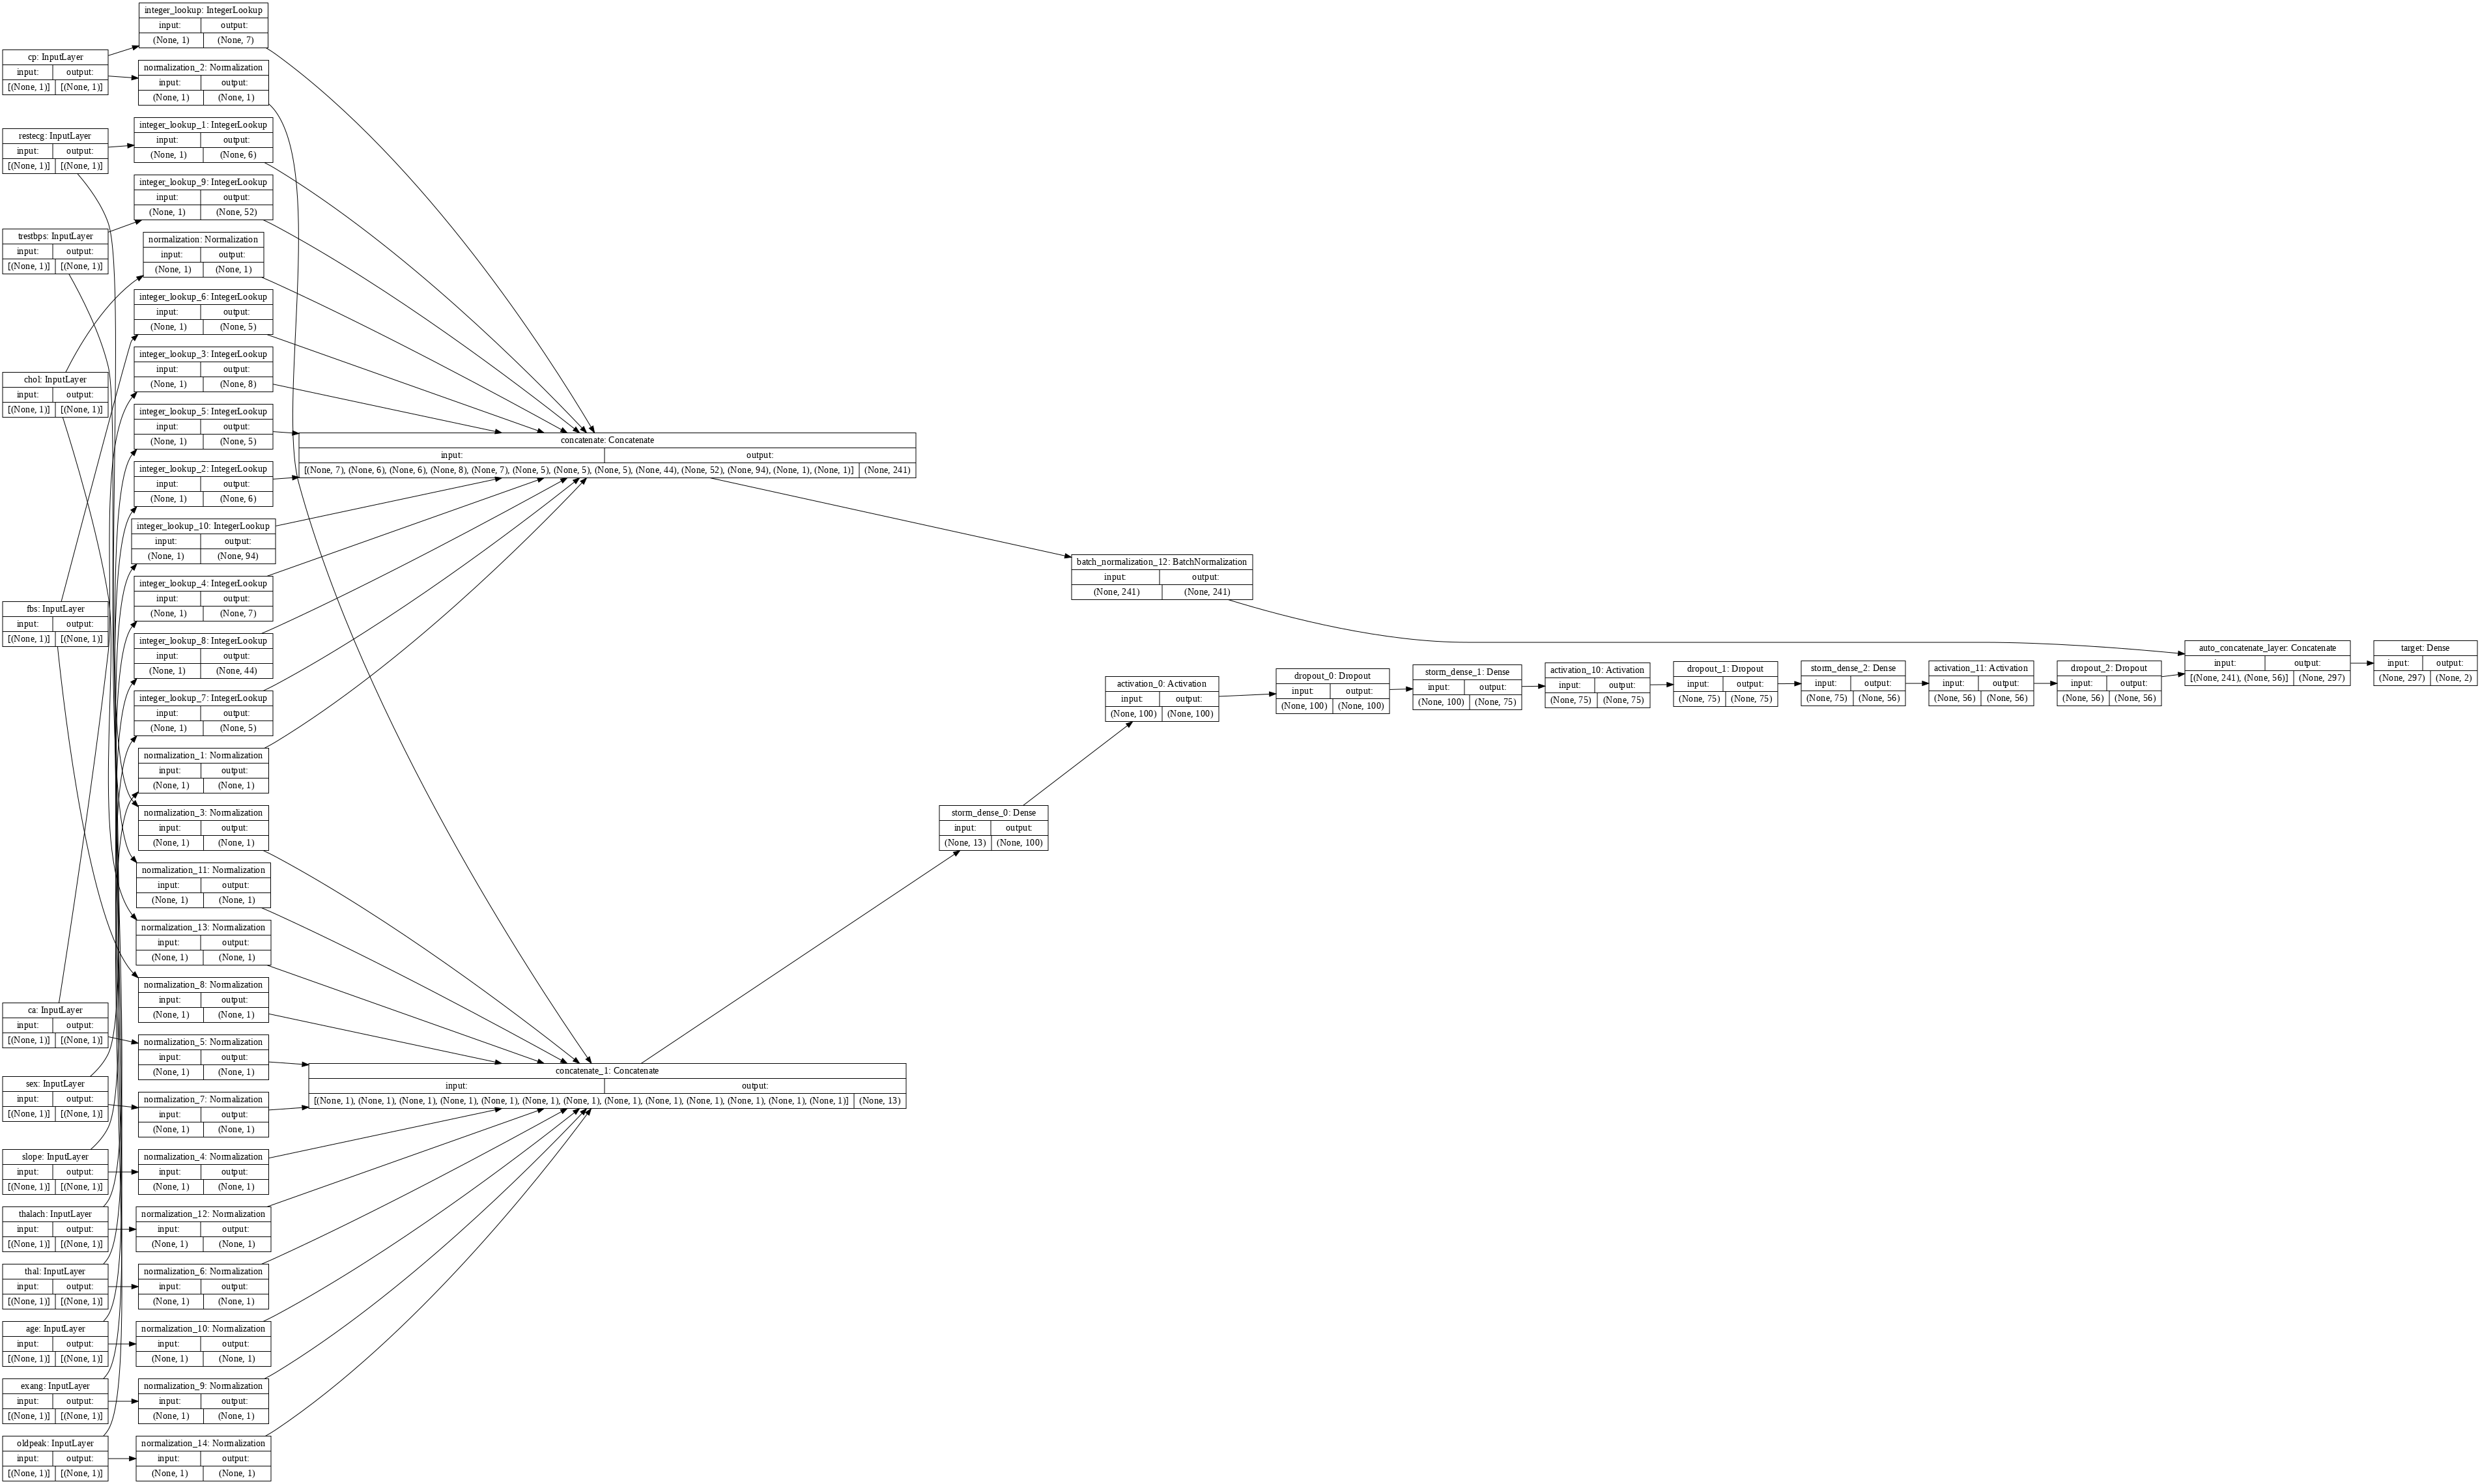

Model plot saved in file: deep_autoviml_Predict Heart Disease_auto_model_after.png


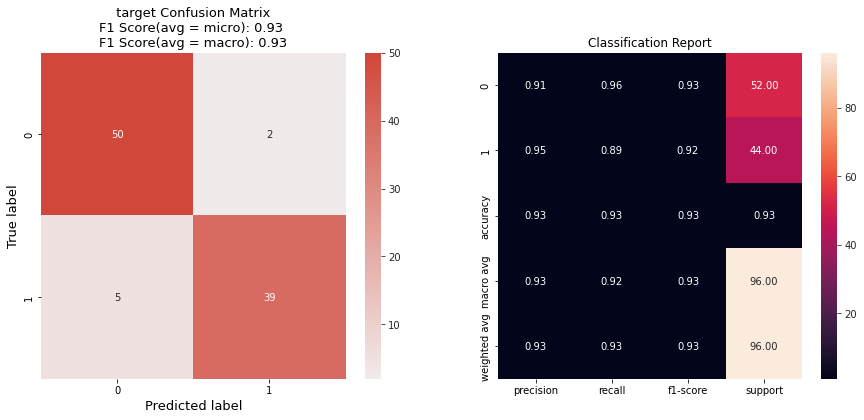

In [15]:
model, dicti = deepauto.fit(df_train, target, keras_model_type=keras_model_type, 
                            project_name=project_name, save_model_flag=False, 
                            model_options=model_options,
                            keras_options=keras_options, use_my_model='', verbose=2)

##4.3. Model Predict

In [26]:
testpath = '/content/test.csv'
test = pd.read_csv(testpath)
predictions = deepauto.predict(model, 
                               project_name=project_name, 
                               test_dataset=test,
                               keras_model_type=keras_model_type, 
                               cat_vocab_dict=dicti)
print(predictions)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7f54d07f5910> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7f54d07f5910> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 308
Alert! Modified column names to satisfy rules for column names in Tensorflow...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    15 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        1 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 0, cats = 0, high cats = 0, very high cats = 0
Distribution of integer columns in datatset:
    number of binary = 4, cat

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test[target].values,predictions[1]))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       159
           1       0.91      0.88      0.89       149

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.90      0.90      0.90       308

